In [388]:
# Vasavi Bondapalli
# Z1915865

In [398]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier

In [399]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [400]:
stroke = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
stroke.shape

(5110, 12)

In [401]:
# using df for feature importance 
df=stroke
df = df.drop('id',axis=1)
df=df.drop('stroke',axis=1)

In [402]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [403]:
# Value counts of the Target Variable
# Here we can see that there is high class imbalance in our target variable

stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [404]:
## Missing Value imputation

In [405]:
# Checking the null values in the dataset

stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [406]:
# We have nulls present in only one column i.e. bmi
# bmi column is of float type so we will fill the nulls by median value.

stroke.bmi = stroke.bmi.fillna(stroke.bmi.median())

In [407]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [408]:
# We do not want id column while creating a model
# So we will drop the id column

stroke = stroke.iloc[:,1:]

In [409]:
## Converting categorical data into columns

In [410]:
# Checking the datatypes of ever column in the dataset

stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [411]:
stroke.gender.value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [412]:
stroke.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [413]:
stroke.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [414]:
stroke.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [415]:
stroke.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [416]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [417]:
# Now we will convert categorical data into numeric

stroke.gender.replace({'Female':0,'Male':1,'Other':2},inplace=True)
stroke.ever_married.replace({'No':0,'Yes':1},inplace=True)
stroke.work_type.replace({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4},inplace=True)
stroke.Residence_type.replace({'Urban':0,'Rural':1},inplace=True)
stroke.smoking_status.replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3},inplace=True)
stroke.stroke.replace({'No':0, 'Yes':1},inplace=True)

In [418]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,0,0,228.69,36.6,2,1
1,0,61.0,0,0,1,1,1,202.21,28.1,0,1
2,1,80.0,0,1,1,0,1,105.92,32.5,0,1
3,0,49.0,0,0,1,0,0,171.23,34.4,3,1
4,0,79.0,1,0,1,1,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,28.1,0,0
5106,0,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,0,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,1,51.0,0,0,1,0,1,166.29,25.6,2,0


In [419]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [420]:
# Splitting the dataset into training and testing datasets

from sklearn.model_selection import train_test_split
train, test = train_test_split(stroke, test_size=0.2,stratify=stroke.stroke)

In [421]:
# value counts of the target variable in train 
train.stroke.value_counts()

0    3889
1     199
Name: stroke, dtype: int64

In [422]:
# Dividing train and test into independent and target variables.
# i.e. train_x, train_y, test_x, test_y

train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]

test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [423]:
# We will create a list of classification algorithm for classifiers

estimators = []
algorithm = []
accuracy = []
Recall0 = []
Recall1 = []

In [424]:
## Q1.
## Train a Decision Tree, Random Forest and Gradient Boosting algorithm to set a baseline performance.
## Use ROC AUC and Average Precision metrics for your evaluation.
## Also, show the precision and recall for both classes. Don’t balance the dataset. 

In [425]:
# Training a Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
estimators.append(('DT',dt))
dt.fit(train_x, train_y)
pred_dt = dt.predict(test_x)
from sklearn.metrics import confusion_matrix, classification_report
tab_dt = confusion_matrix(test_y, pred_dt)
tab_dt

array([[924,  48],
       [ 44,   6]], dtype=int64)

In [426]:
# show the precision and recall for both classes.
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       972
           1       0.11      0.12      0.12        50

    accuracy                           0.91      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.91      0.91      0.91      1022



In [427]:
acc_dt = tab_dt.diagonal().sum()*100/tab_dt.sum()
recall0_dt = tab_dt[0][0]/(tab_dt[0][1] + tab_dt[0][0])
recall1_dt = tab_dt[1][1]/(tab_dt[1][0] + tab_dt[1][1])
algorithm.append('Decision Tree')
accuracy.append(acc_dt)
Recall0.append(recall0_dt)
Recall1.append(recall1_dt)

In [428]:
#ROC AUC and Average Precision metrics for your evaluation.
from sklearn.metrics import roc_auc_score
# predict probabilities
dt_probs = dt.predict_proba(test_x)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(test_y,dt_probs)
#summarize scores
print('Decision Tree : ROC AUC = %.3f' % (dt_auc))
from sklearn.metrics import average_precision_score
ap_dt = average_precision_score(test_y, dt.predict_proba(test_x)[:, 1])
print("Average precision of decision tree: {:.3f}".format(ap_dt))

Decision Tree : ROC AUC = 0.535
Average precision of decision tree: 0.056


In [429]:
# Train a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
estimators.append(('RF',rf))
rf.fit(train_x, train_y)
pred_rf = rf.predict(test_x)
tab_rf = confusion_matrix(test_y, pred_rf)
tab_rf

array([[972,   0],
       [ 49,   1]], dtype=int64)

In [430]:
print(classification_report(test_y, pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [431]:
acc_rf = tab_rf.diagonal().sum()*100/tab_rf.sum()
recall0_rf = tab_rf[0][0]/(tab_rf[0][1] + tab_rf[0][0])
recall1_rf = tab_rf[1][1]/(tab_rf[1][0] + tab_rf[1][1])
algorithm.append('Random Forest')
accuracy.append(acc_rf)
Recall0.append(recall0_rf)
Recall1.append(recall1_rf)
Eval = pd.DataFrame({'Algorithms':algorithm, 'Accuracy':accuracy, 'Recall 0':Recall0, 'Recall 1':Recall1})
Eval

,Algorithms,Accuracy,Recall 0,Recall 1
0,Decision Tree,90.998043,0.950617,0.12
1,Random Forest,95.205479,1.000000,0.02


In [432]:
#ROC AUC and Average Precision metrics for your evaluation.
from sklearn.metrics import roc_auc_score
# predict probabilities
rf_probs = rf.predict_proba(test_x)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(test_y,rf_probs)
#summarize scores
print('Random Forest: ROC AUC = %.3f' % (rf_auc))
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(test_y, rf.predict_proba(test_x)[:, 1])
print("Average precision of random forest: {:.3f}".format(ap_rf))

Random Forest: ROC AUC = 0.809
Average precision of random forest: 0.164


In [433]:
# Training a Gradient Boosting Algorithm
import xgboost as xgb
import xgboost
from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x, train_y)
#xgb.score(test_x, test_y)
pred_gb = xgb.predict(test_x)
tab_gb = confusion_matrix(test_y, pred_gb)
tab_gb

[22:45:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([[963,   9],
       [ 47,   3]], dtype=int64)

In [434]:
print(classification_report(test_y, pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.25      0.06      0.10        50

    accuracy                           0.95      1022
   macro avg       0.60      0.53      0.53      1022
weighted avg       0.92      0.95      0.93      1022



In [435]:
acc_gb = tab_gb.diagonal().sum()*100/tab_gb.sum()
recall0_gb = tab_gb[0][0]/(tab_gb[0][1] + tab_gb[0][0])
recall1_gb = tab_gb[1][1]/(tab_gb[1][0] + tab_gb[1][1])
algorithm.append('Gradiant Boosting')
accuracy.append(acc_gb)
Recall0.append(recall0_gb)
Recall1.append(recall1_gb)
Eval = pd.DataFrame({'Algorithms':algorithm, 'Accuracy':accuracy, 'Recall 0':Recall0, 'Recall 1':Recall1})
Eval

,Algorithms,Accuracy,Recall 0,Recall 1
0,Decision Tree,90.998043,0.950617,0.12
1,Random Forest,95.205479,1.000000,0.02
2,Gradiant Boosting,94.520548,0.990741,0.06


In [436]:
#ROC AUC and Average Precision metrics for your evaluation.
from sklearn.metrics import roc_auc_score
# predict probabilities
xgb_probs = xgb.predict_proba(test_x)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(test_y,xgb_probs)
#summarize scores
print('Gradiant Boosting Algorithm: ROC AUC = %.3f' % (xgb_auc))
from sklearn.metrics import average_precision_score
ap_xgb = average_precision_score(test_y, xgb.predict_proba(test_x)[:, 1])
print("Average precision of gradiant boosting: {:.3f}".format(ap_xgb))

Gradiant Boosting Algorithm: ROC AUC = 0.815
Average precision of gradiant boosting: 0.160


In [437]:
## Q2.
## Balance the dataset using any 4 methods we have discussed in the class and 
## again train a Decision Tree, 
## Random Forest and Gradient Boosting algorithm to compare the performance with models from Q1. 

In [438]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_resample(train_x, train_y)
print(train_x.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))
print(np.bincount(train_y))

rf.fit(X_train_subsample, y_train_subsample)

(4088, 10)
(398, 10)
[199 199]
[3889  199]


RandomForestClassifier()

In [439]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), DecisionTreeClassifier())
scores = cross_validate(undersample_pipe,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with random undersampling , roc_auc and average_precision scores for decision tree are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.53,0.056


 After Balancing dataset with random undersampling , roc_auc and average_precision scores for decision tree are: 


(0.6870253700864941, 0.08565297577345751)

In [440]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import cross_val_score
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier())
scores = cross_validate(undersample_pipe,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with random undersampling , roc_auc and average_precision scores for random forest are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.78, 0.12

 After Balancing dataset with random undersampling , roc_auc and average_precision scores for random forest are: 


(0.8222239711992992, 0.17133429180182097)

In [441]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import cross_val_score
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), GradientBoostingClassifier())
scores = cross_validate(undersample_pipe,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with random undersampling, roc_auc and average_precision scores for gradiant boosting algorithm are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.77,0.112

 After Balancing dataset with random undersampling, roc_auc and average_precision scores for gradiant boosting algorithm are: 


(0.8206823184229357, 0.18425307048649417)

In [442]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(
    train_x, train_y)
print(train_x.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))
print(np.bincount(train_y))

(4088, 10)
(7778, 10)
[3889 3889]
[3889  199]


In [443]:
oversample_pipe = make_imb_pipeline(RandomOverSampler(), DecisionTreeClassifier())
scores = cross_validate(oversample_pipe,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset using random oversampling , roc_auc and average_precision scores for decision tree are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.53,0.056

 After Balancing dataset using random oversampling , roc_auc and average_precision scores for decision tree are: 


(0.5436004293324146, 0.06986020255147654)

In [444]:
oversample_pipe_rf = make_imb_pipeline(RandomOverSampler(),
                                       RandomForestClassifier())
scores = cross_validate(oversample_pipe_rf,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset using random oversampling, roc_auc and average_precision scores for random forest are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.78, 0.12

 After Balancing dataset using random oversampling, roc_auc and average_precision scores for random forest are: 


(0.8017678935582004, 0.16062779492258442)

In [445]:
oversample_pipe_rf = make_imb_pipeline(RandomOverSampler(),
                                       GradientBoostingClassifier())
scores = cross_validate(oversample_pipe_rf,
                        train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset using random oversampling, roc_auc and average_precision scores for gradiant boosting algorithm are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.77,0.112

 After Balancing dataset using random oversampling, roc_auc and average_precision scores for gradiant boosting algorithm are: 


(0.8225405297540753, 0.20388796545028956)

In [446]:
## Edited Nearest Neighbours 
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(n_neighbors=5)
X_train_enn, y_train_enn = enn.fit_resample(train_x, train_y)
enn_mode = EditedNearestNeighbours(kind_sel="mode", n_neighbors=5)
X_train_enn_mode, y_train_enn_mode = enn_mode.fit_resample(train_x, train_y)

In [447]:
enn_pipe = make_imb_pipeline(EditedNearestNeighbours(n_neighbors=5),
                             DecisionTreeClassifier())
scores = cross_validate(enn_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with ENN , roc_auc and average_precision scores for decision tree are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.53,0.056

 After Balancing dataset with ENN , roc_auc and average_precision scores for decision tree are: 


(0.61045388512359, 0.07995825351056585)

In [448]:
enn_pipe = make_imb_pipeline(EditedNearestNeighbours(n_neighbors=5),
                             RandomForestClassifier())
scores = cross_validate(enn_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with ENN , roc_auc and average_precision scores for random forest are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.78, 0.12

 After Balancing dataset with ENN , roc_auc and average_precision scores for random forest are: 


(0.8191730965983984, 0.18469812415436404)

In [449]:
# 
from sklearn.ensemble import GradientBoostingClassifier
enn_pipe = make_imb_pipeline(EditedNearestNeighbours(n_neighbors=5),
                             GradientBoostingClassifier())
scores = cross_validate(enn_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with ENN , roc_auc and average_precision scores for gradiant boosting algorithm are: ")
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
# baseline was 0.77,0.112

 After Balancing dataset with ENN , roc_auc and average_precision scores for gradiant boosting algorithm are: 


(0.838251820792075, 0.22241582745031235)

In [450]:
# SMOTE--Balancing the data
from imblearn.over_sampling import SMOTE
counter=len(train_y)
print('Before Over Sampling', counter)
#oversampling the train datsets using SMOTE
sm=SMOTE()
x_train_sm, y_train_sm=sm.fit_resample(train_x,train_y)
counter=len(y_train_sm)
print('After Over Sampling', counter)
from imblearn.over_sampling import SMOTE
smote_pipe = make_imb_pipeline(SMOTE(), DecisionTreeClassifier())
scores = cross_validate(smote_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with SMOTE , roc_auc and average_precision scores for decision tree are: ")
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()
# baseline was 0.53,0.056

Before Over Sampling 4088
After Over Sampling 7778
 After Balancing dataset with SMOTE , roc_auc and average_precision scores for decision tree are: 


test_roc_auc              0.588654
test_average_precision    0.077117
dtype: float64

In [451]:
smote_pipe = make_imb_pipeline(SMOTE(), RandomForestClassifier(n_estimators=100))
scores = cross_validate(smote_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with SMOTE , roc_auc and average_precision scores for random forest are: ")
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()
# baseline was 0.78, 0.12

 After Balancing dataset with SMOTE , roc_auc and average_precision scores for random forest are: 


test_roc_auc              0.783189
test_average_precision    0.163754
dtype: float64

In [452]:
smote_pipe = make_imb_pipeline(SMOTE(), GradientBoostingClassifier())
scores = cross_validate(smote_pipe, train_x, train_y, cv=10,
                        scoring=('roc_auc', 'average_precision'))
print(" After Balancing dataset with SMOTE , roc_auc and average_precision scores for gradiant boosting algorithm  are: ")
pd.DataFrame(scores)[['test_roc_auc', 'test_average_precision']].mean()
# baseline was 0.77,0.112

 After Balancing dataset with SMOTE , roc_auc and average_precision scores for gradiant boosting algorithm  are: 


test_roc_auc              0.769701
test_average_precision    0.162815
dtype: float64

In [453]:
##  Q3.
## Find the important features using Random Forest and Gradient Boosting algorithms. 

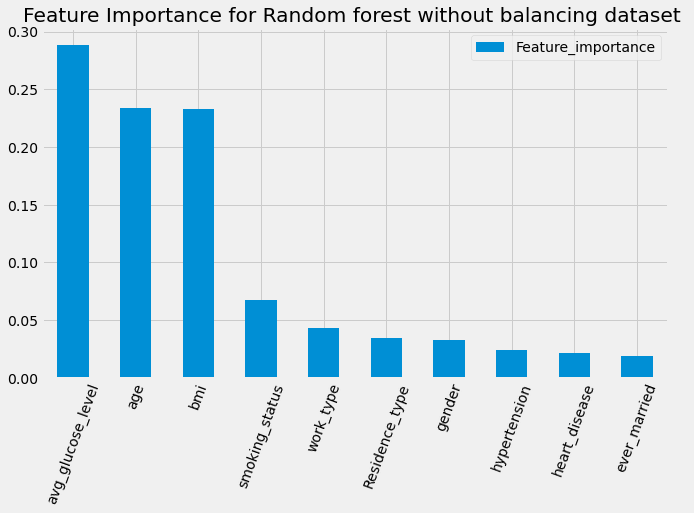

In [454]:
#feature importance using random forest
rf.fit(train_x,train_y)
feature_score = pd.DataFrame(rf.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Random forest without balancing dataset ');

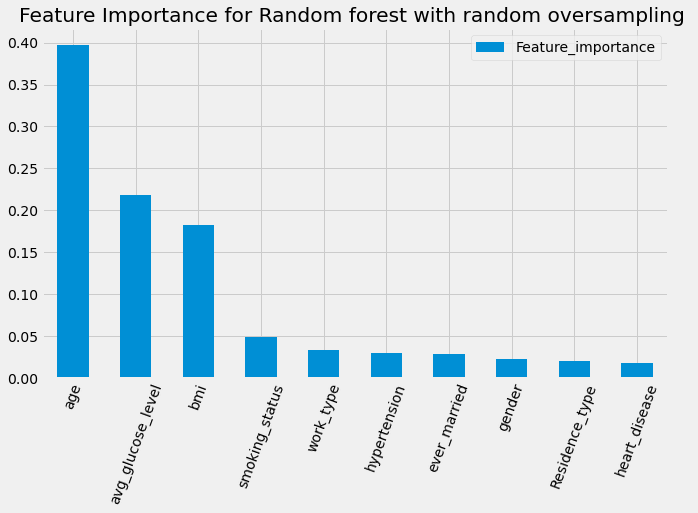

In [455]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(
    train_x, train_y)
rf.fit(X_train_oversample, y_train_oversample)
#feature importance using random forest
feature_score = pd.DataFrame(rf.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Random forest with random oversampling ');

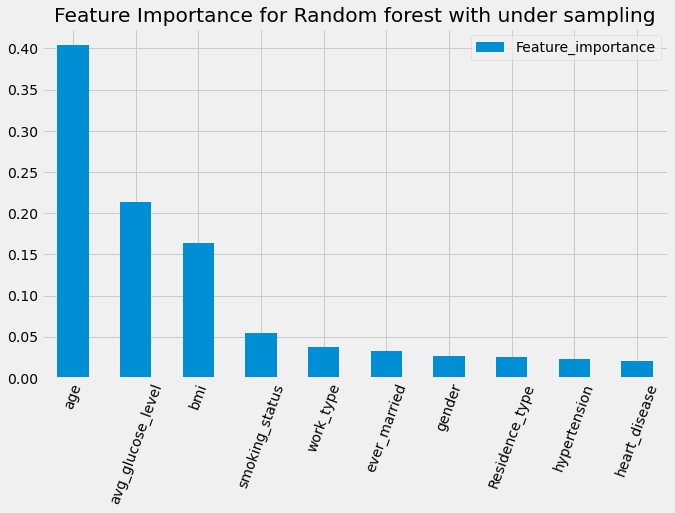

In [456]:
#feature importance using random forest with under sampling
rf.fit(X_train_subsample, y_train_subsample)
feature_score = pd.DataFrame(rf.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Random forest with under sampling');

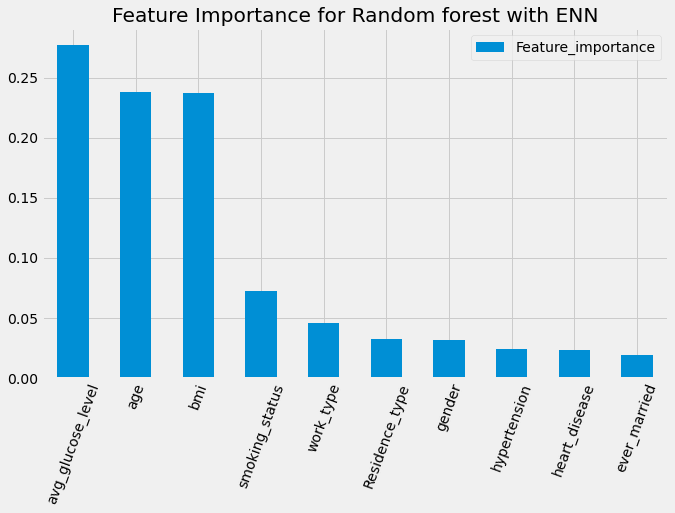

In [457]:
#feature importance using random forest with ENN
rf.fit(X_train_enn_mode, y_train_enn_mode)
feature_score = pd.DataFrame(rf.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Random forest with ENN');

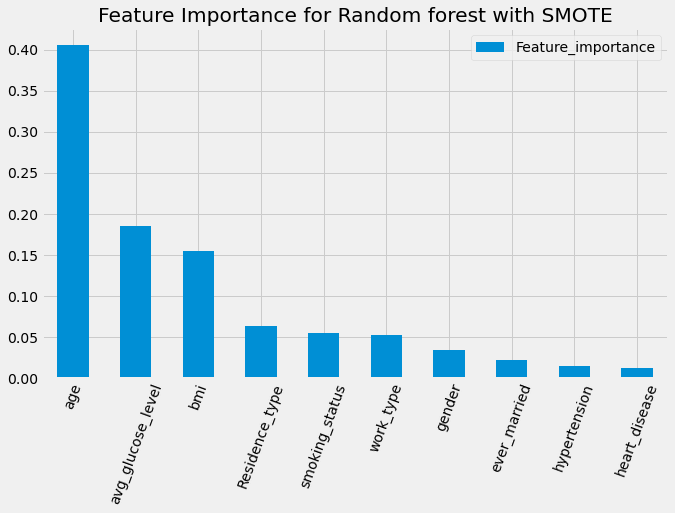

In [458]:
#feature importance using random forest with smote
rf.fit(x_train_sm, y_train_sm)
feature_score = pd.DataFrame(rf.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Random forest with SMOTE');

[22:45:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


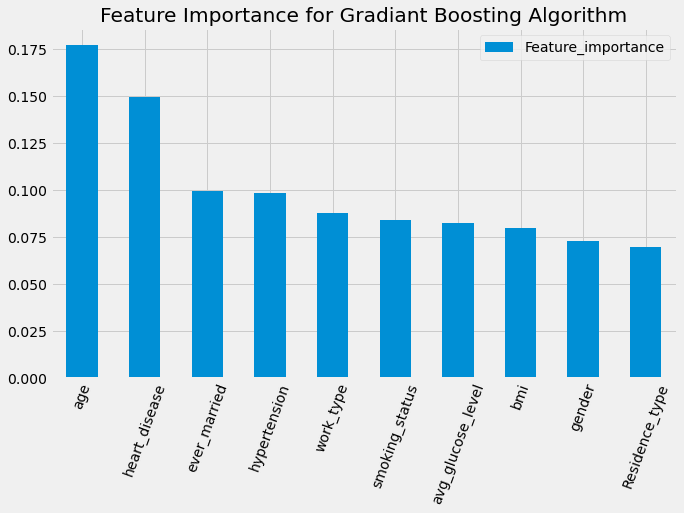

In [459]:
#feature importance using Gradiant Boosting Algorithm
xgb.fit(train_x,train_y)
feature_score = pd.DataFrame(xgb.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Gradiant Boosting Algorithm');

[22:45:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


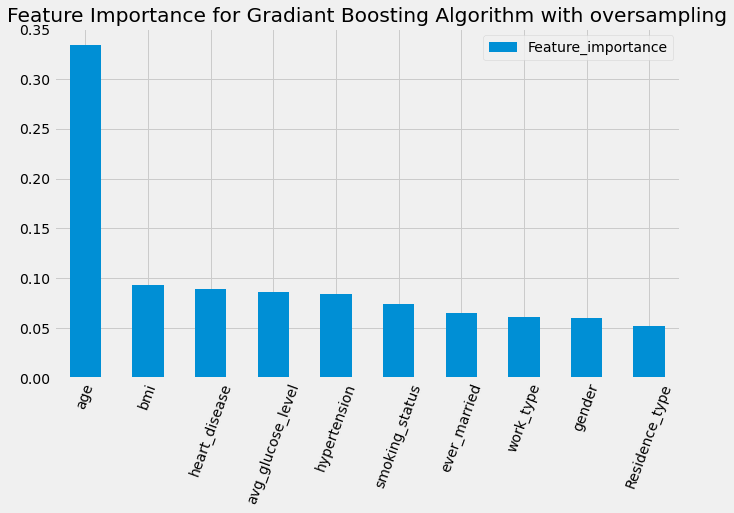

In [460]:
#feature importance using Gradiant Boosting Algorithm with oversampling
xgb.fit(X_train_oversample, y_train_oversample)
feature_score = pd.DataFrame(xgb.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Gradiant Boosting Algorithm with oversampling');


[22:45:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


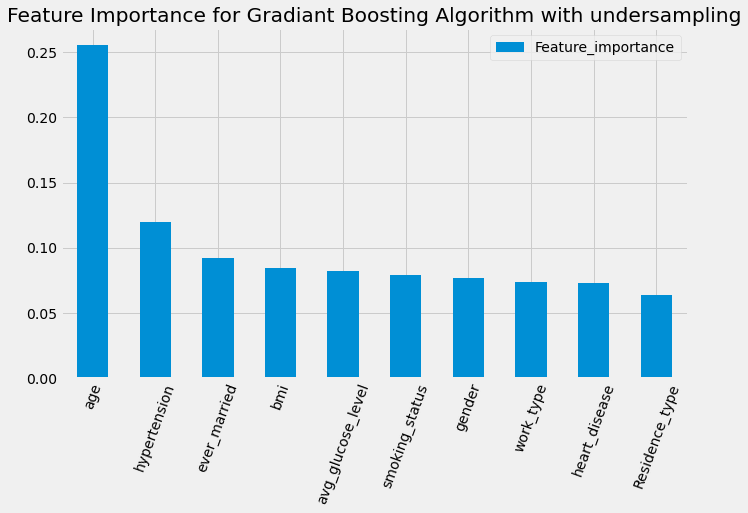

In [461]:
#feature importance using Gradiant Boosting Algorithm with undersampling
xgb.fit(X_train_subsample, y_train_subsample)
feature_score = pd.DataFrame(xgb.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Gradiant Boosting Algorithm with undersampling');


[22:45:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


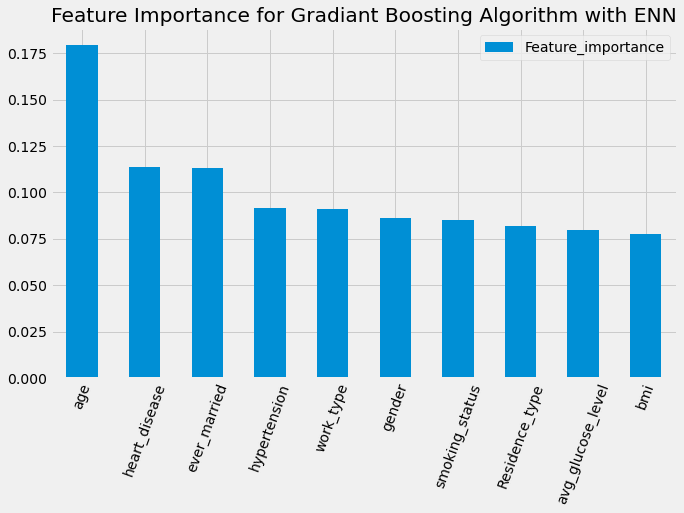

In [462]:
#feature importance using Gradiant Boosting Algorithm with ENN
xgb.fit(X_train_enn_mode, y_train_enn_mode)
feature_score = pd.DataFrame(xgb.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Gradiant Boosting Algorithm with ENN');


[22:45:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


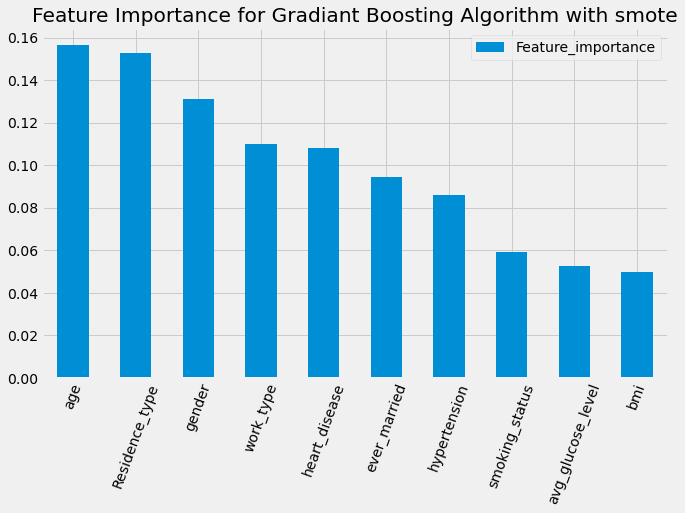

In [463]:
#feature importance using Gradiant Boosting Algorithm with SMOTE
xgb.fit(x_train_sm, y_train_sm)
feature_score = pd.DataFrame(xgb.feature_importances_, index =df.columns,  
                             columns=['Feature_importance']).sort_values('Feature_importance', ascending=False)

plt.rcParams.update({'font.size': 22})
plt.style.use('fivethirtyeight')
feature_score.plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=70);
plt.title('Feature Importance for Gradiant Boosting Algorithm with smote');


In [464]:
# Q4. 
##Write a brief report on how different data balancing techniques improved the performance of your models. 